## Functional and Vestigial Sites

## To generate the functional sites

>rosiec@13-42-76:/Volumes/rosiec/__research/devolab_research/evolution_of_modularity/raw_data/082/INTERTWINED/last_common_ancestor_mutation_landscapes$ python ../../../../../scripts/graph_generation/bar_chart_from_csv.py 
--error 
--groups 3 
--xticks "Static (control),Benign,Hostile" 
--columns "1,2,3" 
--legend "Fluctuating Task Only,Backbone Task Only,Both Tasks" 
--pair 
--title "Vestigial Site Count by Task and Treatment Environment" 
--ylabel "Vestigial Sites" 
--xlabel "Treatment Environment" 
--separator "," 
degenerate_sites__intertwined___nototal.png 
c*_degenerate_site_count.csv 
n*_degenerate_site_count.csv 
p*_degenerate_site_count.csv

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.__version__

u'0.17.0'

In [105]:
%matplotlib inline

In [106]:
import scipy  
from scipy import stats
import scikits.bootstrap as bootstrap  

In [107]:
scipy.__version__

'0.16.1'

In [108]:
%ls func_and_vestigial_sites/

combined_degenerate_site_and_mutation_landscape_metrics.csv*
combined_degenerate_site_and_mutation_landscape_metrics__2step.csv*
control_intertwined__combined_degenerate_site_and_mutation_landscape_metrics.csv*
control_intertwined__combined_degenerate_site_and_mutation_landscape_metrics__plus_2step.csv*
control_intertwined_active_site_count.csv*
control_intertwined_degenerate_site_count.csv
noreward_intertwined__combined_degenerate_site_and_mutation_landscape_metrics.csv*
noreward_intertwined__combined_degenerate_site_and_mutation_landscape_metrics__plus_2step.csv*
noreward_intertwined_active_site_count.csv*
noreward_intertwined_degenerate_site_count.csv
punish_intertwined__combined_degenerate_site_and_mutation_landscape_metrics.csv*
punish_intertwined__combined_degenerate_site_and_mutation_landscape_metrics__plus_2step.csv*
punish_intertwined_active_site_count.csv*
punish_intertwined_degenerate_site_count.csv


In [109]:
%cat func_and_vestigial_sites/control_intertwined_degenerate_site_count.csv | head

0,0,1,1
0,0,0,0
0,0,0,0
0,0,1,1
0,0,1,1
0,0,1,1
0,0,2,2
0,2,1,3
0,0,0,0
0,0,1,1


In [110]:
header_row=['Fluct','BB','Both','Total']

In [111]:

ctrl_degen=pd.read_csv("func_and_vestigial_sites/control_intertwined_degenerate_site_count.csv", names=header_row)
ctrl_degen.head()
ctrl_degen.tail()

,Fluct,BB,Both,Total
41,0,0,0,0
42,3,0,1,4
43,0,2,0,2
44,0,0,0,0
45,0,0,0,0


In [112]:
noreward_degen=pd.read_csv("func_and_vestigial_sites/noreward_intertwined_degenerate_site_count.csv", names=header_row)
noreward_degen.tail()

,Fluct,BB,Both,Total
37,2,0,0,2
38,3,1,1,5
39,0,0,0,0
40,1,0,3,4
41,1,1,1,3


In [113]:
punish_degen=pd.read_csv("func_and_vestigial_sites/punish_intertwined_degenerate_site_count.csv", names=header_row)
punish_degen.tail()

,Fluct,BB,Both,Total
42,4,0,0,4
43,3,1,0,4
44,13,1,0,14
45,2,0,1,3
46,2,2,1,5


In [114]:
ctrl_degen.describe()


,Fluct,BB,Both,Total
count,46.000000,46.000000,46.000000,46.000000
mean,0.108696,0.304348,0.413043,0.826087
std,0.482045,0.756294,0.580271,1.101602
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,1.000000
max,3.000000,3.000000,2.000000,4.000000


In [115]:
noreward_degen.describe()


,Fluct,BB,Both,Total
count,42.000000,42.000000,42.000000,42.000000
mean,2.166667,0.500000,0.333333,3.000000
std,2.887455,0.773021,0.686691,3.068328
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000
50%,1.000000,0.000000,0.000000,2.000000
75%,3.000000,1.000000,0.000000,3.750000
max,11.000000,3.000000,3.000000,11.000000


In [116]:
punish_degen.describe()

,Fluct,BB,Both,Total
count,47.000000,47.000000,47.000000,47.000000
mean,7.617021,0.787234,0.170213,8.574468
std,5.407536,1.196665,0.379883,5.232610
min,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,4.500000
50%,7.000000,0.000000,0.000000,8.000000
75%,10.500000,1.000000,0.000000,12.000000
max,27.000000,6.000000,1.000000,27.000000


In [117]:
c_f_ci = bootstrap.ci(data=ctrl_degen['Fluct'], statfunction=scipy.mean, n_samples=10000)
c_bb_ci = bootstrap.ci(data=ctrl_degen['BB'], statfunction=scipy.mean, n_samples=10000)
c_both_ci = bootstrap.ci(data=ctrl_degen['Both'], statfunction=scipy.mean, n_samples=10000)
ctrl_vals = [ctrl_degen['Fluct'].mean(), 
              ctrl_degen['BB'].mean(), 
              ctrl_degen['Both'].mean(),
              c_f_ci[1]-c_f_ci[0], 
              c_bb_ci[1]-c_bb_ci[0], 
              c_both_ci[1]-c_both_ci[0]]
ctrl_vals

[0.10869565217391304,
 0.30434782608695654,
 0.41304347826086957,
 0.30434782608695654,
 0.43478260869565216,
 0.30434782608695649]

In [118]:
c_f_ci

array([ 0.02173913,  0.32608696])

In [119]:
n_f_ci = bootstrap.ci(data=noreward_degen['Fluct'], statfunction=scipy.mean, n_samples=10000)
n_bb_ci = bootstrap.ci(data=noreward_degen['BB'], statfunction=scipy.mean, n_samples=10000)
n_both_ci = bootstrap.ci(data=noreward_degen['Both'], statfunction=scipy.mean, n_samples=10000)
noreward_vals = [noreward_degen['Fluct'].mean(), 
              noreward_degen['BB'].mean(), 
              noreward_degen['Both'].mean(),
              n_f_ci[1]-n_f_ci[0], 
              n_bb_ci[1]-n_bb_ci[0], 
              n_both_ci[1]-n_both_ci[0]]
noreward_vals

[2.1666666666666665,
 0.5,
 0.33333333333333331,
 1.7857142857142858,
 0.45238095238095244,
 0.40476190476190477]

In [120]:
p_f_ci = bootstrap.ci(data=punish_degen['Fluct'], statfunction=scipy.mean, n_samples=10000)
p_bb_ci = bootstrap.ci(data=punish_degen['BB'], statfunction=scipy.mean, n_samples=10000)
p_both_ci = bootstrap.ci(data=punish_degen['Both'], statfunction=scipy.mean, n_samples=10000)
punish_vals = [punish_degen['Fluct'].mean(), 
              punish_degen['BB'].mean(), 
              punish_degen['Both'].mean(),
              p_f_ci[1]-p_f_ci[0], 
              p_bb_ci[1]-p_bb_ci[0], 
              p_both_ci[1]-p_both_ci[0]]
punish_vals

[7.6170212765957448,
 0.78723404255319152,
 0.1702127659574468,
 3.1063829787234045,
 0.70212765957446821,
 0.21276595744680854]

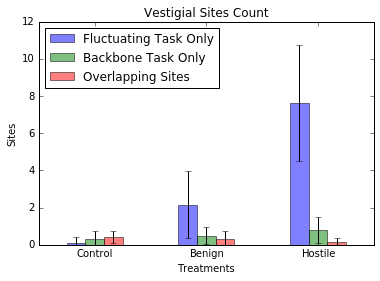

In [121]:
sectioned = pd.DataFrame([ctrl_vals, noreward_vals, punish_vals], 
                        columns = ['Fluctuating Task Only', 'Backbone Task Only', 'Overlapping Sites', 'fluct_std', 'bb_std', 'both_std'],
                        index = ['Control', 'Benign', 'Hostile'])
ax = sectioned[['Fluctuating Task Only', 'Backbone Task Only', 'Overlapping Sites']].plot(kind='bar', 
                                                       yerr=sectioned[['fluct_std','bb_std', 'both_std']].values.T,
                                                       alpha = 0.5,
                                                       ylim=[0,12],
                                                        rot=0,
                                                        title="Vestigial Sites Count",
                                                       error_kw=dict(ecolor='k'))
ax.set_xlabel("Treatments")
ax.set_ylabel("Sites")
fig = ax.get_figure()
fig.savefig("vestigial_sites.png")

## Stats for the means
    

In [122]:
z_stat, p_val = stats.ranksums(noreward_degen['Fluct'], punish_degen['Fluct'])
print "MWW RankSum P =", p_val
print "MWW RankSum F =", z_stat

MWW RankSum P = 1.60204560453e-08
MWW RankSum F = -5.65026083327


In [123]:
z_stat, p_val = stats.ranksums(noreward_degen['BB'], punish_degen['BB'])
print "MWW RankSum P =", p_val
print "MWW RankSum F =", z_stat

MWW RankSum P = 0.300417396919
MWW RankSum F = -1.03553871272


In [124]:
z_stat, p_val = stats.ranksums(noreward_degen['Both'], punish_degen['Both'])
print "MWW RankSum P =", p_val
print "MWW RankSum F =", z_stat

MWW RankSum P = 0.516166241134
MWW RankSum F = 0.64926633575


In [125]:
f_val, p_val = stats.f_oneway(ctrl_degen['Fluct'], noreward_degen['Fluct'], punish_degen['Fluct'])  
  
print "One-way ANOVA P =", p_val
print "One-way ANOVA F =", f_val

One-way ANOVA P = 6.0269978102e-18
One-way ANOVA F = 54.3514967208


In [126]:
f_val, p_val = stats.f_oneway(ctrl_degen['BB'], noreward_degen['BB'], punish_degen['BB'])  
  
print "One-way ANOVA P =", p_val
print "One-way ANOVA F =", f_val

One-way ANOVA P = 0.0474397518903
One-way ANOVA F = 3.11978584489


In [127]:
f_val, p_val = stats.f_oneway(ctrl_degen['Both'], noreward_degen['Both'], punish_degen['Both'])  
  
print "One-way ANOVA P =", p_val
print "One-way ANOVA F =", f_val

One-way ANOVA P = 0.105689917309
One-way ANOVA F = 2.28594216102


## Pulling in the functional site data

rosiec@13-42-76:/Volumes/rosiec/__research/devolab_research/evolution_of_modularity/raw_data/082/INTERTWINED/last_common_ancestor_mutation_landscapes$ python ../../../../../scripts/graph_generation/bar_chart_from_csv.py --error --groups 3 --xticks "Static (control),Benign,Hostile" --columns "1,2,3" --legend "Fluctuating Task Only,Backbone Task Only,Both Tasks" --pair --title "Functional Site Count by Task

and Treatment Environment" --ylabel "Functional Sites" --xlabel "Treatment Environment" --separator "," active_sites__intertwined___nototal.png c*_active_site_count.csv n*_active_site_count.csv p*_active_site_count.csv

In [128]:
%ls func_and_vestigial_sites/

combined_degenerate_site_and_mutation_landscape_metrics.csv*
combined_degenerate_site_and_mutation_landscape_metrics__2step.csv*
control_intertwined__combined_degenerate_site_and_mutation_landscape_metrics.csv*
control_intertwined__combined_degenerate_site_and_mutation_landscape_metrics__plus_2step.csv*
control_intertwined_active_site_count.csv*
control_intertwined_degenerate_site_count.csv
noreward_intertwined__combined_degenerate_site_and_mutation_landscape_metrics.csv*
noreward_intertwined__combined_degenerate_site_and_mutation_landscape_metrics__plus_2step.csv*
noreward_intertwined_active_site_count.csv*
noreward_intertwined_degenerate_site_count.csv
punish_intertwined__combined_degenerate_site_and_mutation_landscape_metrics.csv*
punish_intertwined__combined_degenerate_site_and_mutation_landscape_metrics__plus_2step.csv*
punish_intertwined_active_site_count.csv*
punish_intertwined_degenerate_site_count.csv


In [129]:
%cat func_and_vestigial_sites/control_intertwined_active_site_count.csv | head

2, 2, 15,19
2, 2, 17,21
2, 2, 17,21
2, 2, 16,20
3, 1, 17,21
3, 2, 15,20
2, 2, 17,21
2, 0, 16,18
2, 2, 17,21
2, 2, 16,20


In [130]:
ctrl_active=pd.read_csv("func_and_vestigial_sites/control_intertwined_active_site_count.csv", names=header_row)
ctrl_active.head()
ctrl_active.tail()

,Fluct,BB,Both,Total
41,6,1,14,21
42,3,2,15,20
43,2,0,18,20
44,2,2,17,21
45,3,2,16,21


In [131]:
noreward_active=pd.read_csv("func_and_vestigial_sites/noreward_intertwined_active_site_count.csv", names=header_row)
noreward_active.head()
noreward_active.tail()

,Fluct,BB,Both,Total
37,6,2,15,23
38,8,1,13,22
39,2,2,17,21
40,4,1,16,21
41,4,1,15,20


In [132]:
punish_active=pd.read_csv("func_and_vestigial_sites/punish_intertwined_active_site_count.csv", names=header_row)
punish_active.head()
punish_active.tail()

,Fluct,BB,Both,Total
42,10,3,16,29
43,14,1,18,33
44,4,2,17,23
45,3,2,16,21
46,9,2,17,28


In [133]:
c_f_ci = bootstrap.ci(data=ctrl_active['Fluct'], statfunction=scipy.mean, n_samples=10000)
c_bb_ci = bootstrap.ci(data=ctrl_active['BB'], statfunction=scipy.mean, n_samples=10000)
c_both_ci = bootstrap.ci(data=ctrl_active['Both'], statfunction=scipy.mean, n_samples=10000)
ctrl_vals = [ctrl_active['Fluct'].mean(), 
              ctrl_active['BB'].mean(), 
              ctrl_active['Both'].mean(),
              c_f_ci[1]-c_f_ci[0], 
              c_bb_ci[1]-c_bb_ci[0], 
              c_both_ci[1]-c_both_ci[0]]
ctrl_vals

[2.5,
 1.673913043478261,
 16.173913043478262,
 0.73913043478260887,
 0.45652173913043481,
 0.69565217391304301]

In [134]:
n_f_ci = bootstrap.ci(data=noreward_active['Fluct'], statfunction=scipy.mean, n_samples=10000)
n_bb_ci = bootstrap.ci(data=noreward_active['BB'], statfunction=scipy.mean, n_samples=10000)
n_both_ci = bootstrap.ci(data=noreward_active['Both'], statfunction=scipy.mean, n_samples=10000)
noreward_vals = [noreward_active['Fluct'].mean(), 
              noreward_active['BB'].mean(), 
              noreward_active['Both'].mean(),
              n_f_ci[1]-n_f_ci[0], 
              n_bb_ci[1]-n_bb_ci[0], 
              n_both_ci[1]-n_both_ci[0]]
noreward_vals

[5.6190476190476186,
 1.5238095238095237,
 15.857142857142858,
 1.7380952380952381,
 0.61904761904761907,
 0.76190476190476275]

In [135]:
p_f_ci = bootstrap.ci(data=punish_active['Fluct'], statfunction=scipy.mean, n_samples=10000)
p_bb_ci = bootstrap.ci(data=punish_active['BB'], statfunction=scipy.mean, n_samples=10000)
p_both_ci = bootstrap.ci(data=punish_active['Both'], statfunction=scipy.mean, n_samples=10000)
punish_vals = [punish_active['Fluct'].mean(), 
              punish_active['BB'].mean(), 
              punish_active['Both'].mean(),
              p_f_ci[1]-p_f_ci[0], 
              p_bb_ci[1]-p_bb_ci[0], 
              p_both_ci[1]-p_both_ci[0]]
punish_vals

[8.5957446808510642,
 2.9361702127659575,
 14.319148936170214,
 2.4893617021276588,
 2.3191489361702122,
 2.5744680851063837]

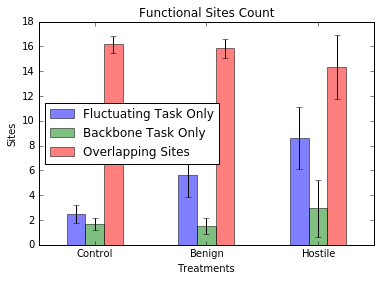

In [136]:
sectioned = pd.DataFrame([ctrl_vals, noreward_vals, punish_vals], 
                        columns = ['Fluctuating Task Only', 'Backbone Task Only', 'Overlapping Sites', 'fluct_std', 'bb_std', 'both_std'],
                        index = ['Control', 'Benign', 'Hostile'])
ax = sectioned[['Fluctuating Task Only', 'Backbone Task Only', 'Overlapping Sites']].plot(kind='bar', 
                                                       yerr=sectioned[['fluct_std','bb_std', 'both_std']].values.T,
                                                       alpha = 0.5,
                                                       #ylim=[0,18],
                                                        rot=0,
                                                        title="Functional Sites Count",
                                                       error_kw=dict(ecolor='k'))
ax.set_xlabel("Treatments")
ax.set_ylabel("Sites")
fig = ax.get_figure()
fig.savefig("active_sites.png")

## Lost and Regained Tasks

rosiec@Loki:/Volumes/rosiec/__research/devolab_research/evolution_of_modularity/raw_data/082/INTERTWINED/last_common_ancestor_mutation_landscapes$ python ../../../../../scripts/graph_generation/bar_chart_from_csv.py 
--groups 3 
--xticks "Control,Benign,Hostile" 
--columns "3" 
--pair 
--title "Fraction of Second-step Mutants that Regained Fluctuating Task" 
--ylabel "Fraction" 
--xlabel "Treatment" 
--separator "," 
--error 
--show twostep_does_fluct.png 
c*_*/mutation_landscape_metrics.csv 
n*_*/mutation_landscape_metrics.csv 
p*_*/mutation_landscape_metrics.csv &

rosiec@Loki:/Volumes/rosiec/__research/devolab_research/evolution_of_modularity/raw_data/085$ python ../../../scripts/graph_generation/bar_chart_from_csv.py 
--groups 3 
--xticks "Control,Control,Hostile" 
--columns "3" 
--pair --title "Fraction of Second-step Mutants that Regained Fluctuating Task" 
--ylabel "Fraction" --xlabel "Treatment" --separator "," --show --error 
two_step__regained_fluct.png 
c*_i/mutation_landscape_metrics.csv 
n*_i/mutation_landscape_metrics.csv 
p*_i/mutation_landscape_metrics.csv &


In [137]:
%ls 

1_step_lost_EQU.png
1step_no_longer_does_EQU.png
1step_still_does_EQU.png
2_step_regained_EQU.png
Changing Environments - Functional and Vestigial Sites.ipynb
Stats for Sexual Selection Significance.ipynb
active_sites.png
c_i_1step_mutation_landscape_metrics.csv
c_i_2nd_step_mutation_landscape_metrics.csv
func_and_vestigial_sites/
n_i_1step_mutation_landscape_metrics.csv
n_i_2nd_step_mutation_landscape_metrics.csv
p_i_1step_mutation_landscape_metrics.csv
p_i_2nd_step_mutation_landscape_metrics.csv
recomb_viab.sh
vestigial_sites.png


In [138]:
% cat c_i_1step_mutation_landscape_metrics.csv| head

0.870217324763,0.732170186716,0.731558004285,0.716559534741,0.138047138047,0.138659320478,0.123048668503,0.0,0.0,0.0,0.138047138047,0.138659320478,0.123048668503,0.0,0.0
0.791857973676,0.658402203857,0.657483930211,0.643403734313,0.133455769819,0.134374043465,0.119375573921,0.0,0.0,0.0,0.133455769819,0.134374043465,0.119375573921,0.0,0.0
0.868686868687,0.72237526783,0.722069176615,0.707070707071,0.146311600857,0.146617692072,0.131313131313,0.0,0.0,0.0,0.146311600857,0.146617692072,0.131313131313,0.0,0.0
0.772268135904,0.643403734313,0.642791551882,0.628711355984,0.128864401592,0.129476584022,0.114784205693,0.0,0.0,0.0,0.128864401592,0.129476584022,0.114784205693,0.0,0.0
0.878175696358,0.734006734007,0.717783899602,0.709213345577,0.144168962351,0.160391796755,0.135598408326,0.0,0.0,0.0,0.144168962351,0.160391796755,0.135598408326,0.0,0.0
0.876645240282,0.746862565044,0.740434649526,0.725742271197,0.129782675237,0.136210590756,0.115090296908,0.0,0.0,0.0,0.129782675237,0.136210590756,0.11

In [139]:
landscape_header= ["FracViable", 
                   "FracDoesXOR", 
                   "FracDoesEQU", 
                   "FracDoesBoth", 
                   "FracChangedXOR", 
                   "FracChangedEQU", 
                   "FracChangedBoth",
                    "frac_gained_XOR",
                    "frac_gained_EQU",
                    "frac_gained_both",
                    "frac_lost_XOR",
                    "frac_lost_EQU",
                    "frac_lost_both",
                    "frac_gained_XOR_lost_EQU",
                    "frac_lost_XOR_gained_EQU"]


In [140]:
c_i_1step_landscape=pd.read_csv("c_i_1step_mutation_landscape_metrics.csv", names=landscape_header)
c_i_1step_landscape.head()
c_i_1step_landscape.tail()
c_i_1step_landscape['frac_lost_EQU'].describe()

count    46.000000
mean      0.139118
std       0.009270
min       0.111111
25%       0.134680
50%       0.138659
75%       0.144858
max       0.160698
Name: frac_lost_EQU, dtype: float64

In [141]:
n_i_1step_landscape=pd.read_csv("n_i_1step_mutation_landscape_metrics.csv", names=landscape_header)
n_i_1step_landscape['frac_lost_EQU'].describe()
#n_i_1step_landscape.tail()

count    42.000000
mean      0.181964
std       0.040577
min       0.121824
25%       0.157713
50%       0.170340
75%       0.203551
max       0.318947
Name: frac_lost_EQU, dtype: float64

In [142]:
p_i_1step_landscape=pd.read_csv("p_i_1step_mutation_landscape_metrics.csv", names=landscape_header)
p_i_1step_landscape['frac_lost_EQU'].describe()
#p_i_1step_landscape.tail()

count    47.000000
mean      0.208663
std       0.071989
min       0.000000
25%       0.175696
50%       0.224365
75%       0.249158
max       0.323232
Name: frac_lost_EQU, dtype: float64

In [143]:
c_i_2step_landscape=pd.read_csv("c_i_2nd_step_mutation_landscape_metrics.csv", names=landscape_header)
c_i_2step_landscape['frac_gained_EQU'].describe()
#c_i_2step_landscape.tail()

count    46.000000
mean      0.003594
std       0.002071
min       0.001548
25%       0.002319
50%       0.002666
75%       0.004469
max       0.010178
Name: frac_gained_EQU, dtype: float64

In [144]:
n_i_2step_landscape=pd.read_csv("n_i_2nd_step_mutation_landscape_metrics.csv", names=landscape_header)
n_i_2step_landscape['frac_gained_EQU'].describe()
#c_i_2step_landscape.tail()

count    42.000000
mean      0.012642
std       0.007637
min       0.001466
25%       0.007878
50%       0.010043
75%       0.017603
max       0.028410
Name: frac_gained_EQU, dtype: float64

In [145]:
p_i_2step_landscape=pd.read_csv("p_i_2nd_step_mutation_landscape_metrics.csv", names=landscape_header)
p_i_2step_landscape['frac_gained_EQU'].describe()
#c_i_2step_landscape.tail()

count    44.000000
mean      0.015303
std       0.010264
min       0.003424
25%       0.007717
50%       0.012775
75%       0.020286
max       0.049676
Name: frac_gained_EQU, dtype: float64

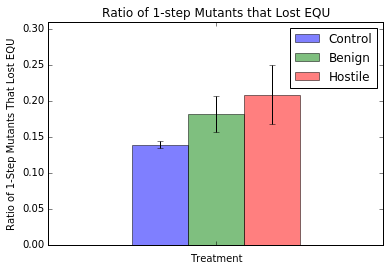

In [157]:
# calculating the boostrap error values
c_lost_ci = bootstrap.ci(data=c_i_1step_landscape['frac_lost_EQU'], statfunction=scipy.mean, n_samples=10000)
n_lost_ci = bootstrap.ci(data=n_i_1step_landscape['frac_lost_EQU'], statfunction=scipy.mean, n_samples=10000)
p_lost_ci = bootstrap.ci(data=p_i_1step_landscape['frac_lost_EQU'], statfunction=scipy.mean, n_samples=10000)


#c_bb_ci = bootstrap.ci(data=ctrl_active['BB'], statfunction=scipy.mean, n_samples=10000)
#c_both_ci = bootstrap.ci(data=ctrl_active['Both'], statfunction=scipy.mean, n_samples=10000)
lost_vals = [c_i_1step_landscape['frac_lost_EQU'].mean(), 
              n_i_1step_landscape['frac_lost_EQU'].mean(), 
              p_i_1step_landscape['frac_lost_EQU'].mean(),
              c_lost_ci[1]-c_lost_ci[0], 
              n_lost_ci[1]-n_lost_ci[0], 
              p_lost_ci[1]-p_lost_ci[0]]

sectioned = pd.DataFrame([lost_vals], 
                        columns = ['Control', 'Benign', 'Hostile', 'c_err', 'n_err', 'p_err'],
                        index = [''])
ax = sectioned[['Control', 'Benign', 'Hostile']].plot(kind='bar', 
                                                       yerr=sectioned[['c_err','n_err', 'p_err']].values.T,
                                                       alpha = 0.5,
                                                       ylim=[0,0.31],
                                                        rot=0,
                                                        title="Ratio of 1-step Mutants that Lost EQU",
                                                       error_kw=dict(ecolor='k'))
ax.set_xlabel("Treatment")
ax.set_ylabel("Ratio of 1-Step Mutants That Lost EQU")
fig = ax.get_figure()
fig.savefig("1_step_lost_EQU.png")

In [160]:
f_stat, p_val = stats.f_oneway(c_i_1step_landscape['frac_lost_EQU'], 
                               n_i_1step_landscape['frac_lost_EQU'], 
                               p_i_1step_landscape['frac_lost_EQU'])
print f_stat
print p_val

if p_val < (0.05/3): #bonferroni
    print "reject null of sameness (different)"
else:
    print "can't reject null of sameness"

24.3211990161
1.01807536085e-09
reject null of sameness (different)


In [161]:
z_stat, p_val = stats.ranksums(c_i_1step_landscape['frac_lost_EQU'], n_i_1step_landscape['frac_lost_EQU'])  
print z_stat
print p_val
if p_val < (0.05/3): #bonferroni
    print "reject null of sameness (different)"
else:
    print "can't reject null of sameness"

-6.59126938901
4.36081787061e-11
reject null of sameness (different)


In [162]:
z_stat, p_val = stats.ranksums(c_i_1step_landscape['frac_lost_EQU'], p_i_1step_landscape['frac_lost_EQU'])  
print z_stat
print p_val
if p_val < (0.05/3): #bonferroni
    print "reject null of sameness (different)"
else:
    print "can't reject null of sameness"

-6.70830955812
1.96891909454e-11
reject null of sameness (different)


In [163]:
z_stat, p_val = stats.ranksums(n_i_1step_landscape['frac_lost_EQU'], p_i_1step_landscape['frac_lost_EQU'])  
print z_stat
print p_val
if p_val < (0.05/3): #bonferroni
    print "reject null of sameness (different)"
else:
    print "can't reject null of sameness"

-3.43535858663
0.000591770223079
reject null of sameness (different)


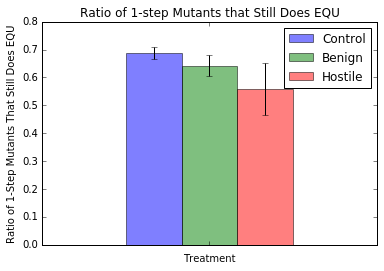

In [147]:
# calculating the boostrap error values
c_doesEQU_ci = bootstrap.ci(data=c_i_1step_landscape['FracDoesEQU'], statfunction=scipy.mean, n_samples=10000)
n_doesEQU_ci = bootstrap.ci(data=n_i_1step_landscape['FracDoesEQU'], statfunction=scipy.mean, n_samples=10000)
p_doesEQU_ci = bootstrap.ci(data=p_i_1step_landscape['FracDoesEQU'], statfunction=scipy.mean, n_samples=10000)


#c_bb_ci = bootstrap.ci(data=ctrl_active['BB'], statfunction=scipy.mean, n_samples=10000)
#c_both_ci = bootstrap.ci(data=ctrl_active['Both'], statfunction=scipy.mean, n_samples=10000)
stilldoes_vals = [c_i_1step_landscape['FracDoesEQU'].mean(), 
              n_i_1step_landscape['FracDoesEQU'].mean(), 
              p_i_1step_landscape['FracDoesEQU'].mean(),
              c_doesEQU_ci[1]-c_doesEQU_ci[0], 
              n_doesEQU_ci[1]-n_doesEQU_ci[0], 
              p_doesEQU_ci[1]-p_doesEQU_ci[0]]

sectioned = pd.DataFrame([stilldoes_vals], 
                        columns = ['Control', 'Benign', 'Hostile', 'c_err', 'n_err', 'p_err'],
                        index = [''])
ax = sectioned[['Control', 'Benign', 'Hostile']].plot(kind='bar', 
                                                       yerr=sectioned[['c_err','n_err', 'p_err']].values.T,
                                                       alpha = 0.5,
                                                       #ylim=[0,0.31],
                                                        rot=0,
                                                        title="Ratio of 1-step Mutants that Still Does EQU",
                                                       error_kw=dict(ecolor='k'))
ax.set_xlabel("Treatment")
ax.set_ylabel("Ratio of 1-Step Mutants That Still Does EQU")
fig = ax.get_figure()
fig.savefig("1step_still_does_EQU.png")

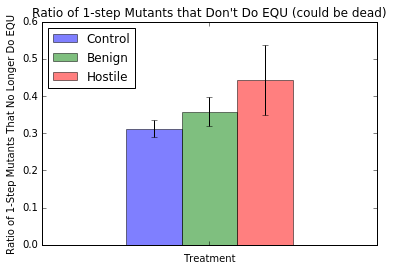

In [148]:
# calculating the boostrap error values
c_inv_doesEQU_ci = bootstrap.ci(data=c_i_1step_landscape['FracDoesEQU'], statfunction=scipy.mean, n_samples=10000)
n_inv_doesEQU_ci = bootstrap.ci(data=n_i_1step_landscape['FracDoesEQU'], statfunction=scipy.mean, n_samples=10000)
p_inv_doesEQU_ci = bootstrap.ci(data=p_i_1step_landscape['FracDoesEQU'], statfunction=scipy.mean, n_samples=10000)


#c_bb_ci = bootstrap.ci(data=ctrl_active['BB'], statfunction=scipy.mean, n_samples=10000)
#c_both_ci = bootstrap.ci(data=ctrl_active['Both'], statfunction=scipy.mean, n_samples=10000)
inv_stilldoes_vals = [1-c_i_1step_landscape['FracDoesEQU'].mean(), 
              1-n_i_1step_landscape['FracDoesEQU'].mean(), 
              1-p_i_1step_landscape['FracDoesEQU'].mean(),
              c_inv_doesEQU_ci[1]-c_inv_doesEQU_ci[0], 
              n_inv_doesEQU_ci[1]-n_inv_doesEQU_ci[0], 
              p_inv_doesEQU_ci[1]-p_inv_doesEQU_ci[0]]

sectioned = pd.DataFrame([inv_stilldoes_vals], 
                        columns = ['Control', 'Benign', 'Hostile', 'c_err', 'n_err', 'p_err'],
                        index = [''])
ax = sectioned[['Control', 'Benign', 'Hostile']].plot(kind='bar', 
                                                       yerr=sectioned[['c_err','n_err', 'p_err']].values.T,
                                                       alpha = 0.5,
                                                       #ylim=[0,0.31],
                                                        rot=0,
                                                        title="Ratio of 1-step Mutants that Don't Do EQU (could be dead)",
                                                       error_kw=dict(ecolor='k'))
ax.set_xlabel("Treatment")
ax.set_ylabel("Ratio of 1-Step Mutants That No Longer Do EQU")
fig = ax.get_figure()
fig.savefig("1step_no_longer_does_EQU.png")

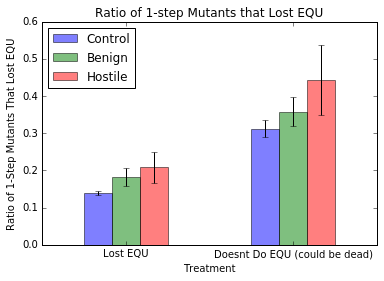

In [156]:
# calculating the boostrap error values
c_lost_ci = bootstrap.ci(data=c_i_1step_landscape['frac_lost_EQU'], statfunction=scipy.mean, n_samples=10000)
n_lost_ci = bootstrap.ci(data=n_i_1step_landscape['frac_lost_EQU'], statfunction=scipy.mean, n_samples=10000)
p_lost_ci = bootstrap.ci(data=p_i_1step_landscape['frac_lost_EQU'], statfunction=scipy.mean, n_samples=10000)


#c_bb_ci = bootstrap.ci(data=ctrl_active['BB'], statfunction=scipy.mean, n_samples=10000)
#c_both_ci = bootstrap.ci(data=ctrl_active['Both'], statfunction=scipy.mean, n_samples=10000)
lost_vals = [c_i_1step_landscape['frac_lost_EQU'].mean(), 
              n_i_1step_landscape['frac_lost_EQU'].mean(), 
              p_i_1step_landscape['frac_lost_EQU'].mean(),
              c_lost_ci[1]-c_lost_ci[0], 
              n_lost_ci[1]-n_lost_ci[0], 
              p_lost_ci[1]-p_lost_ci[0]]

sectioned = pd.DataFrame([lost_vals, inv_stilldoes_vals], 
                        columns = ['Control', 'Benign', 'Hostile', 'c_err', 'n_err', 'p_err'],
                        index = ['Lost EQU', 'Doesnt Do EQU (could be dead)'])
ax = sectioned[['Control', 'Benign', 'Hostile']].plot(kind='bar', 
                                                       yerr=sectioned[['c_err','n_err', 'p_err']].values.T,
                                                       alpha = 0.5,
                                                       #ylim=[0,0.31],
                                                        rot=0,
                                                        title="Ratio of 1-step Mutants that Lost EQU",
                                                       error_kw=dict(ecolor='k'))
ax.set_xlabel("Treatment")
ax.set_ylabel("Ratio of 1-Step Mutants That Lost EQU")
fig = ax.get_figure()
fig.savefig("1_step_lost_and_dont_do_EQU.png")

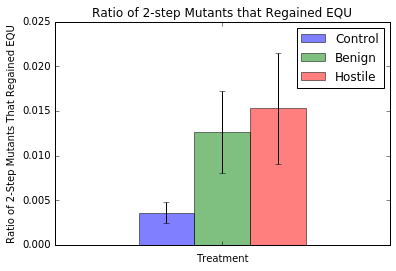

In [158]:
c_regained_ci = bootstrap.ci(data=c_i_2step_landscape['frac_gained_EQU'], statfunction=scipy.mean, n_samples=10000)
n_regained_ci = bootstrap.ci(data=n_i_2step_landscape['frac_gained_EQU'], statfunction=scipy.mean, n_samples=10000)
p_regained_ci = bootstrap.ci(data=p_i_2step_landscape['frac_gained_EQU'], statfunction=scipy.mean, n_samples=10000)

regained_vals = [c_i_2step_landscape['frac_gained_EQU'].mean(), 
              n_i_2step_landscape['frac_gained_EQU'].mean(), 
              p_i_2step_landscape['frac_gained_EQU'].mean(),
              c_regained_ci[1]-c_regained_ci[0], 
              n_regained_ci[1]-n_regained_ci[0], 
              p_regained_ci[1]-p_regained_ci[0]]
regained_vals

sectioned = pd.DataFrame([regained_vals], 
                        columns = ['Control', 'Benign', 'Hostile', 'c_err', 'n_err', 'p_err'],
                        index = [''])
ax = sectioned[['Control', 'Benign', 'Hostile']].plot(kind='bar', 
                                                       yerr=sectioned[['c_err','n_err', 'p_err']].values.T,
                                                       alpha = 0.5,
                                                       ylim=[0,0.025],
                                                        rot=0,
                                                        title="Ratio of 2-step Mutants that Regained EQU",
                                                       error_kw=dict(ecolor='k'))
ax.set_xlabel("Treatment")
ax.set_ylabel("Ratio of 2-Step Mutants That Regained EQU")
fig = ax.get_figure()
fig.savefig("2_step_regained_EQU.png")

In [165]:
f_stat, p_val = stats.f_oneway(c_i_2step_landscape['frac_gained_EQU'], 
                               n_i_2step_landscape['frac_gained_EQU'], 
                               p_i_2step_landscape['frac_gained_EQU'])
print f_stat
print p_val

if p_val < (0.05/3): #bonferroni
    print "reject null of sameness (different)"
else:
    print "can't reject null of sameness"

30.8230368561
1.14377074876e-11
reject null of sameness (different)


In [166]:
z_stat, p_val = stats.ranksums(c_i_2step_landscape['frac_gained_EQU'], n_i_2step_landscape['frac_gained_EQU'])  
print z_stat
print p_val
if p_val < (0.05/3): #bonferroni
    print "reject null of sameness (different)"
else:
    print "can't reject null of sameness"

-6.11509403391
9.65000437043e-10
reject null of sameness (different)


In [167]:
z_stat, p_val = stats.ranksums(c_i_2step_landscape['frac_gained_EQU'], p_i_2step_landscape['frac_gained_EQU'])  
print z_stat
print p_val
if p_val < (0.05/3): #bonferroni
    print "reject null of sameness (different)"
else:
    print "can't reject null of sameness"

-7.38559972862
1.51767729343e-13
reject null of sameness (different)


In [168]:
z_stat, p_val = stats.ranksums(n_i_2step_landscape['frac_gained_EQU'], p_i_2step_landscape['frac_gained_EQU'])  
print z_stat
print p_val
if p_val < (0.05/3): #bonferroni
    print "reject null of sameness (different)"
else:
    print "can't reject null of sameness"

-0.725703636497
0.468020472005
can't reject null of sameness


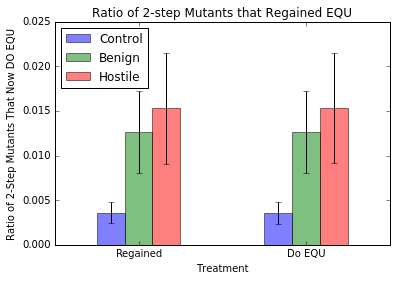

In [159]:
c_regained_do_ci = bootstrap.ci(data=c_i_2step_landscape['FracDoesEQU'], statfunction=scipy.mean, n_samples=10000)
n_regained_do_ci = bootstrap.ci(data=n_i_2step_landscape['FracDoesEQU'], statfunction=scipy.mean, n_samples=10000)
p_regained_do_ci = bootstrap.ci(data=p_i_2step_landscape['FracDoesEQU'], statfunction=scipy.mean, n_samples=10000)

regained_do_vals = [c_i_2step_landscape['FracDoesEQU'].mean(), 
              n_i_2step_landscape['FracDoesEQU'].mean(), 
              p_i_2step_landscape['FracDoesEQU'].mean(),
              c_regained_do_ci[1]-c_regained_do_ci[0], 
              n_regained_do_ci[1]-n_regained_do_ci[0], 
              p_regained_do_ci[1]-p_regained_do_ci[0]]
regained_do_vals

sectioned = pd.DataFrame([regained_vals, regained_do_vals], 
                        columns = ['Control', 'Benign', 'Hostile', 'c_err', 'n_err', 'p_err'],
                        index = ['Regained', 'Do EQU'])
ax = sectioned[['Control', 'Benign', 'Hostile']].plot(kind='bar', 
                                                       yerr=sectioned[['c_err','n_err', 'p_err']].values.T,
                                                       alpha = 0.5,
                                                       #ylim=[0,0.025],
                                                        rot=0,
                                                        title="Ratio of 2-step Mutants that Regained EQU",
                                                       error_kw=dict(ecolor='k'))
ax.set_xlabel("Treatment")
ax.set_ylabel("Ratio of 2-Step Mutants That Now DO EQU")
fig = ax.get_figure()
fig.savefig("2_step_regained_and_do_EQU.png")